In [ ]:
from sklearn import datasets
from sklearn import svm

d = datasets.load_iris()
print(d.DESCR)

In [ ]:
for i in range(0, len(d.data)): # 샘플 순서대로 출력
  print(i + 1, d.data[i], d.target[i])
  # i + 1: 샘플 번호
  # d.data[i]: 특성 데이터 - [sepal length, sepal width, petal length, petal width]
  # 정답 class label(d.target[i]) - 0: setosa, 1: versicolor, 2: virginica

In [ ]:
# 데이터를 가지고 모델링과 예측하기
from sklearn import svm

s = svm.SVC(gamma=0.1, C=10) # 하이퍼 매개변수란? -> 모델의 구조를 결정하는 매개변수
                             # gamma: 결정 경계의 곡률을 결정
                             # C: 오분류 허용 정도(작을수록 허용)
s.fit(d.data, d.target) # 훈련 - 모델링

new_d = [
  [6.4, 3.2, 6.0, 2.5],
  [7.1, 3.1, 4.7, 1.35],
] # 2개 샘플

res = s.predict(new_d) # 예측
print("새로운 2개 샘플의 부류는", res)

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length', color='species')
# fig.show(renderer="browser")
fig.show()

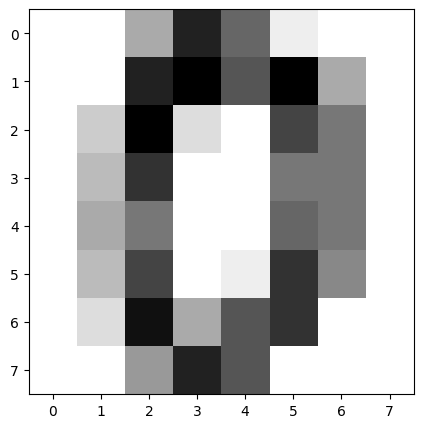

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
이 숫자는  0 입니다.


In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

digit=datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[0],cmap=plt.cm.gray_r,interpolation='nearest') # 0번 샘플을 그림
plt.show()
print(digit.data[0]) # 0번 샘플의 화솟값을 출력
print("이 숫자는 ",digit.target[0],"입니다.")

In [7]:
from sklearn import datasets
from sklearn import svm

digit=datasets.load_digits()

# svm의 분류기 모델 SC를 학습
s=svm.SVC(gamma=0.1,C=10)
s.fit(digit.data,digit.target) # digit 데이터로 모델링

# 훈련 집합의 앞에 있는 샘플 3개를 새로운 샘플로 간주하고 인식해봄
new_d=[digit.data[0],digit.data[1],digit.data[2]]
res=s.predict(new_d)
print("예측값은", res)
print("참값은", digit.target[0],digit.target[1],digit.target[2])

# 훈련 집합을 테스트 집합으로 간주하여 인식해보고 정확률을 측정
res=s.predict(digit.data)
correct=[i for i in range(len(res)) if res[i]==digit.target[i]]
# print(correct)
accuracy=len(correct)/len(res)
print("화소 특징을 사용했을 때 정확률=",accuracy*100, "%")

예측값은 [0 1 2]
참값은 0 1 2
화소 특징을 사용했을 때 정확률= 100.0 %


In [8]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# svm의 분류 모델 SVC를 학습
s=svm.SVC(gamma=0.001)
s.fit(x_train,y_train)

res=s.predict(x_test)

# 혼동 행렬 구함
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 측정하고 출력
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

[[69.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 66.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 71.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 80.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 73.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 85.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 75.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 79.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 51.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 65.]]
테스트 집합에 대한 정확률은 99.30458970792768 %입니다.


In [9]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

digit=datasets.load_digits()
s=svm.SVC(gamma=0.001)
accuracies=cross_val_score(s,digit.data,digit.target,cv=5) # 5-겹 교차 검증

print(accuracies)
print("정확률(평균)=%0.3f, 표준편차 =%0.3f"%(accuracies.mean()*100,accuracies.std()))

[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확률(평균)=97.219, 표준편차 =0.015
